In [1]:
# Import Libaries and tools
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})

ROOT_DIR = os.path.abspath("../../")

In [2]:
# Key Varibles
cr = 'CR2101'

# Data Summary
datasetFile = 'Results/' + cr + '.csv.TempFx.npz'

# Step size
step = 25 # This function will choose and display similarty for every nth entry in the CR

In [3]:
# Open data summary
data = np.load(datasetFile, allow_pickle=True)
lst = data.files

IOUpast    = data[lst[0]]
IOUfuture  = data[lst[1]]
SSIMpast   = data[lst[2]]
SSIMfuture = data[lst[3]]
GCEpast    = data[lst[4]]
GCEfuture  = data[lst[5]]
LCEpast    = data[lst[6]]
LCEfuture  = data[lst[7]]

In [4]:
print('Number of Entries: ',len(IOUpast))

Number of Entries:  582


In [5]:
# Calculate Stats
meanIOUpast    = np.nanmean(IOUpast,axis=0)
stdIOUpast     = np.nanstd(IOUpast,axis=0)
meanIOUfuture  = np.nanmean(IOUfuture,axis=0)
stdIOUfuture   = np.nanstd(IOUfuture,axis=0)
meanSSIMpast   = np.nanmean(SSIMpast,axis=0)
stdSSIMpast    = np.nanstd(SSIMpast,axis=0)
meanSSIMfuture = np.nanmean(SSIMfuture,axis=0)
stdSSIMfuture  = np.nanstd(SSIMfuture,axis=0)
meanGCEpast    = np.nanmean(GCEpast,axis=0)
stdGCEpast     = np.nanstd(GCEpast,axis=0)
meanGCEfuture  = np.nanmean(GCEfuture,axis=0)
stdGCEfuture   = np.nanstd(GCEfuture,axis=0)
meanLCEpast    = np.nanmean(LCEpast,axis=0)
stdLCEpast     = np.nanstd(LCEpast,axis=0)
meanLCEfuture  = np.nanmean(LCEfuture,axis=0)
stdLCEfuture   = np.nanstd(LCEfuture,axis=0)

In [6]:
# Ensure Folder Exists
saveDirectory = '/Figures/TempEffects/'
saveDirectory = ROOT_DIR + saveDirectory

if not os.path.exists(saveDirectory):
    os.makedirs(saveDirectory)

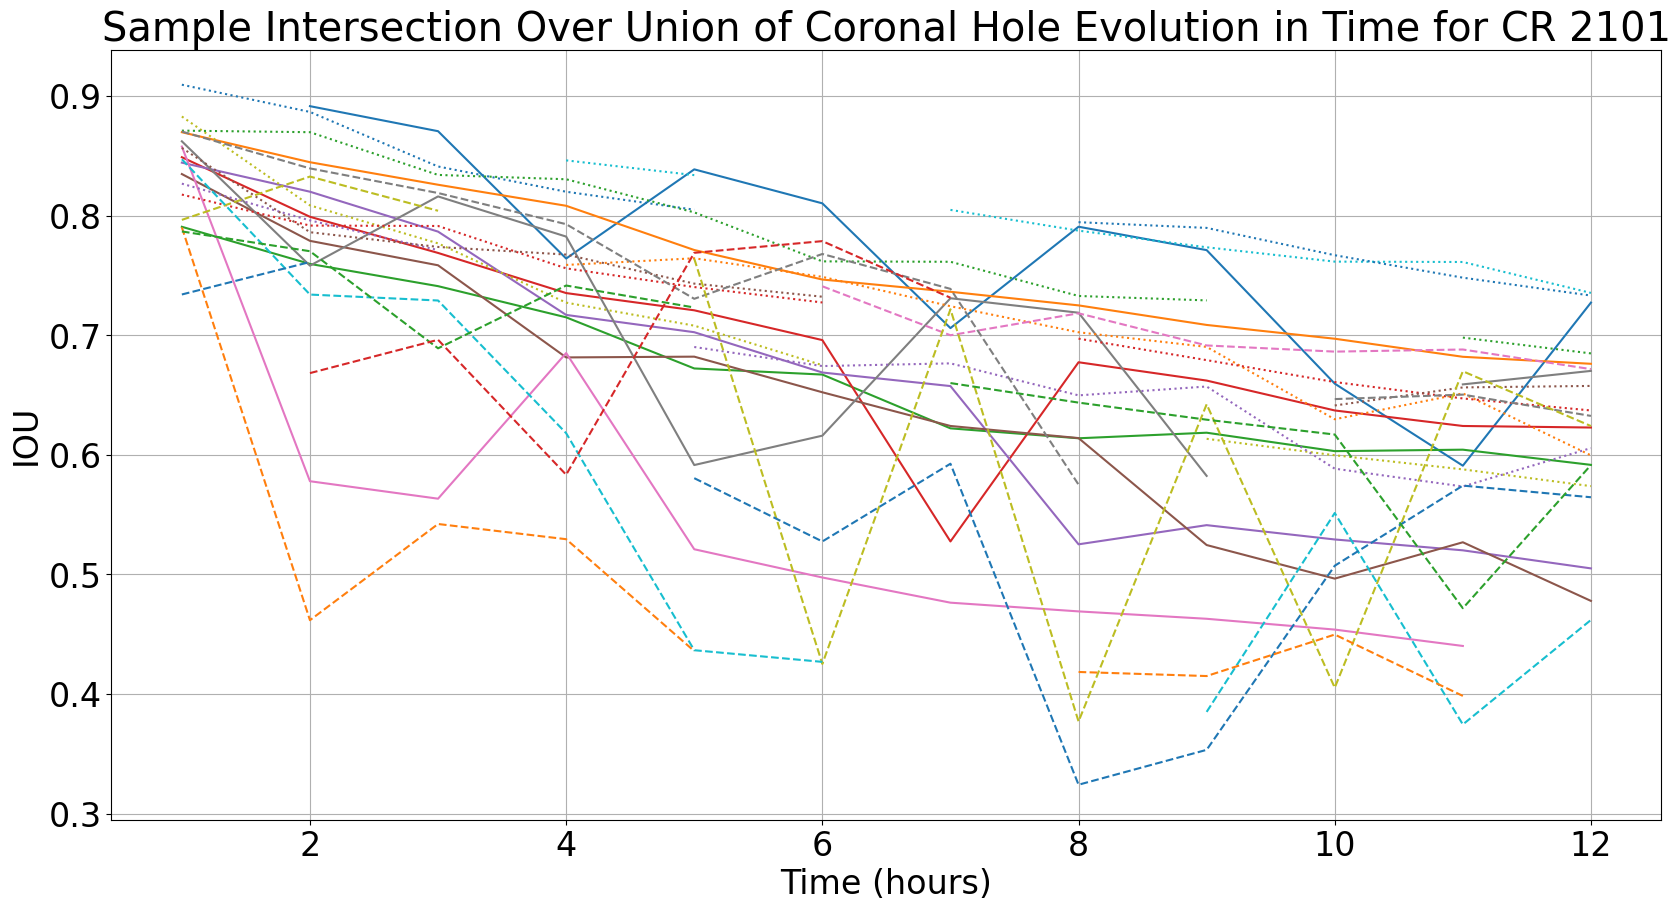

In [7]:
# IOU
plt.figure(figsize=[20,10])
plt.rcParams.update({'font.size': 24})
s = 'Sample Intersection Over Union of Coronal Hole Evolution in Time for CR ' + cr[2:]
plt.title(s)

# timeframe
hours = np.asarray(range(len(meanIOUfuture)))+ 1

# Plot
linetype = ['-',':','--','-.']
for i in range(0,len(IOUfuture),step):
    
    plt.plot(hours,IOUfuture[i],linetype[int(i/(step*8))])

plt.ylabel('IOU')
plt.xlabel('Time (hours)')
plt.grid()

# Save Figure
title = 'IOU_samples_' + cr + '.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()